
<center><img src='Images/scipy_logo.png' style="width:200px"></center>

<br>

# <center><b>Scipy-stats Project</b></center>


<br>

## Table of Contents
***

#### 1. [Introduction]()
#### 2. [Exploration of the Data]()
- [Visualise the Data](#)<br>

#### 3. [t-Test]()<br>
#### 4. [Anova]()<br>


<br>

***
## <center>1. Introduction</center>
***

<br>

The SciPy library contains many statistical functions which are fundamental to data analysis. The scipy.stats package is a sub-package of the SciPy library and mainly deals with probabilistic distributions and statistical functions. It is an open-source library and is continuously growing in functionality.[https://data-flair.training/blogs/scipy-statistical-functions/]

In this project, we will look at the t-test function from the scipy-stats package.

## The null hypothesis/hypothesis testing
***

blablabla

***
# <center> 2. Exploration of the Data </center>
***

<br>

### Import libraries
***

<br>

Here, we are simply importing all of the libraries that we will use throughout this notebook.

In [95]:
# Numerical arrays.
import numpy as np

# Dataframes.
import pandas as pd

# Plots.
import matplotlib.pyplot as plt

# More aesthetic plots.
import seaborn as sns

# Statistics.
import scipy.stats as ss

# Set default plot size.
plt.rcParams['figure.figsize'] = (12, 6)

# Set default plot style.
plt.style.use("ggplot")

<br>

### Load the data
***

<br>

We are loading the data directly from the Github URL using the Pandas [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [11]:
# Load the blood pressure dataset from its URL with pandas.
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")


<br>

### Getting a 'feel' for the data
***

<br>

There are a number of functions from the Pandas library that we can use to get some useful information about the dataset.

In [12]:
# View basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [13]:
# View the first few rows.
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [14]:
# Check for any null values.
df.isnull().count()

patient      120
sex          120
agegrp       120
bp_before    120
bp_after     120
dtype: int64

The result shows there are no null values in the dataset.

In [15]:
# Summary statistics.
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


In [110]:
# Assign male after blood pressure to vaiable 'male'.
male = df['bp_after'][df['sex'] == 'Male']

# # Assign male after blood pressure to vaiable 'female'.
female = df['bp_after'][df['sex'] == 'Female']

<br>

## Visualise the data
***

<br>

In this section we are interested in observing the difference in means between the male and female groups.

<br>

#### Box plots
***
To create a boxplot, we will use the [Seaborn function boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) on top of the [Matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function to establish subplots.

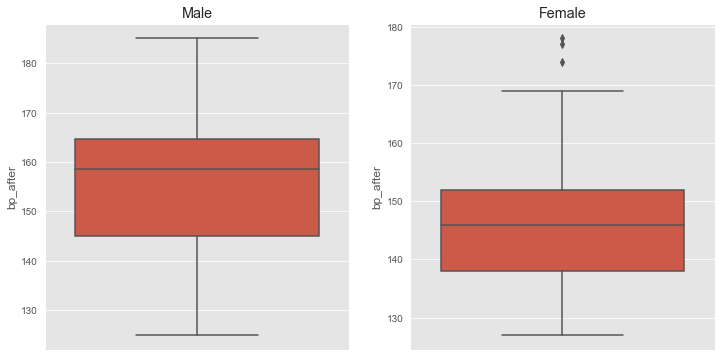

In [112]:
# Change plot size. 
plt.rcParams['figure.figsize'] = (12, 6)

# Create one figure and two plots.
fig, ax = plt.subplots(1, 2)

# Set to a default style.
sns.set_style("darkgrid")

# Plot boxplot of male bp data after treatment. 
sns.boxplot(ax=ax[0], data=df, y=male)

# Set plot title for first plot.
ax[0].set_title(label="Male")

# Plot boxplot of female bp data after treatment.
sns.boxplot(ax=ax[1], data=df, y=female)

# Set plot title for second plot.
ax[1].set_title(label="Female");

The <b>median in the male group appears off-center</b> while there appears to be some <b>outliers in the female plot</b>. At this stage, creating another visualisation is <b>important in order to establish whether the data is skewed</b> (or non-symmetric) as this may affect the type of statistical analysis we can use on the data.

<br>

#### Histograms with kernal density estimate (kde)
***

Here we are using [Seaborn's histplot function](https://seaborn.pydata.org/generated/seaborn.histplot.html) with the `kde` parameter set to True. This will return a histogram plot with a kernel density estimate (an estimate of the probability density function) which will allow us to evaluate the extent to which the data is skewed.

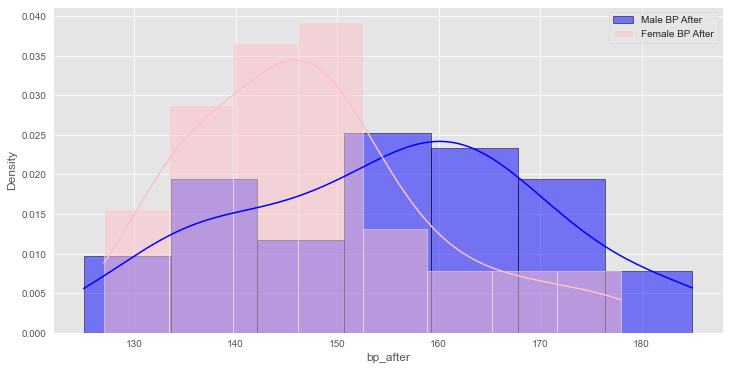

In [109]:
# Plot male values on histogram. 
sns.histplot(male, kde=True, color="blue", edgecolor="black", label="Male BP After", stat='density')

# Plot female values on histogram.
sns.histplot(female, kde=True, color="pink", label="Female BP After", stat='density')
plt.legend();

<i>What does the plot tell us?</i>

- Looking at the plot, it is actually the <b>male data that appears more skewed</b>. With a normal ditribution you will see a bell shaped curve. The kde's here show that the data is <b>relatively symmetrical</b> (approximately bell-shaped) and should be sufficient to use in our analysis.

- Further, the <b>difference in means between the male and female groups appears to be significant</b>. However, it is a good idea to perform a test to figure out whether the difference in means is reliable or if it is simply due to chance. This can be measured using a t-Test.

<br>

***
# <center>3. t-Test</center>

[Scipy t-Test Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
***

<br>

### What is a t-Test?

([Recommended read by Ian](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php))

A t-Test is a type of inferential statistic which can tell us whether there is a significant difference between the means of two groups and whether the difference is reliable or if it could simply be attributed to chance.[https://www.investopedia.com/terms/t/t-test.asp] It is usually implemented on datasets where there is a normal distribution of data which may contain unknown variances. The t-Test is one of the most common statistical tests used in hypothesis testing.

<br>

### Scipy.stats t-Test
***
<br>


<i>Function:</i>

`scipy.stats.ttest_ind()`

<i>From the documentation:</i>

"Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default."

Find p value & t value.


<br>

In [113]:
# Run t-Test. 
t_ss, p_ss = ss.ttest_ind(male, female)

# Print t-value and p_value.
print(f"t-value: {t_ss}\tp-value: {p_ss}")

# Print rounded p_value.
print(f"P_scipy: {p_ss:0.2f}")

t-value: 3.3479506182111387	p-value: 0.0010930222986154283
P_scipy: 0.00


<br>

<b>The p-value is 0.001 which is a statistically significant.</b>


<br>

### Assumption check
***

<br>

Assumption checks are an important part of the t-Test. 

Here, we will look at the [t-Test assumptions](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp) and check our data simultaneously. 

<br>

1. <i>The scale of measurement applied to the data must be continuous (or ordinal).</i>

<b>Check:</b> The BP data we are using is continuous as the value can be anywhere on scale (i.e, there are a number of measurements between two realistic points).

2. <i>The data is collected from a representative, randomly selected portion of the total population.</i>

<b>Check:</b> For the purposes of the project this assumption it is neccessary to satisfy this assumption.

3. <i>The data is normally distributed i.e, when plotted it is a bell-shaped distribution curve.</i>

<b>Check:</b> The data does have a normal distribution shape as seen with the histogram plot above and the kde curve.

4. <i>The sample is a sufficient size, that is, that it is a reasonably large set. A sufficiently large sample should appear as a bell-shaped curve.</i>

<b>Check:</b> As above, the data has a bell-shaped curve.

5. <i>The final assumption is the the homogeneity of variance (or statistical assumption of equal variance) is when the standard deviations of the samples are approximately the same.</i>
    
<b>Check:</b> Apart from the small number of outliers, we can conjecture the above assumption is true. 
    
<br>

Source: [Investopedia](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp)

#### Next:
- Maybe test male & female's seperately - could then plot data.
- Do: Levene's test of homogeneity of variances - to check if there are high levels of variance which can lead to incorrect assumptions.